# Réponse gravimétrique d'une anomalie sphérique

Dans cet exercice, on modélise la réponse gravimétrique d'une anomalie sphérique dans un milieu encaissant uniforme.

On étudie ensuite comment change la réponse en fonction des paramètres de l'anomalie.

Les modèles sphériques sont souvent utilisés pour représenter des structures géologiques réelles telles un diapir de sel ou une intrusion magmatique.

Notebook inspiré de https://glq2200.clberube.org/ 

In [161]:
# *** On commence toujours par importer les librairies requises

# outils numériques
import numpy as np  

# libraries graphiques
import matplotlib.pyplot as plt 
from matplotlib.patches import Circle
plt.rcParams.update({'font.size': 16}) # Définir taille de police par défaut des graphs

In [162]:
# *** Paramètres et fonctions de base

# Définir la constante gravitationelle
G = 6.67408e-11  # m^3 kg^-1 s^-2

# Définir une fonction qui calcule la réponse gravimétrique d'une sphère
def gravite_sphere(x, z, x0, z0, a, rho):
    """
    Réponse gravimétrique d'une sphère
    
    arguments:
    x:   Vecteur de position des points de mesures le long de l'axe x
    z:   Vecteur de position des points de mesures le long de l'axe z (verticale)
    x0:  Position en x du centre de la sphère
    z0:  Position en z du centre de la sphère
    a:   Rayon de la sphère
    rho: Contraste de densité de la sphère
    """
    A = G * rho * (4/3) * np.pi * a**3
    B = (z - z0) / ((x - x0)**2 + (z - z0)**2)**(3/2)
    return A * B

In [155]:
# *** Définir les points de mesure 
x = np.arange(-700, 700, 1)  # un vecteur représentant l'axe x
z = 0  # on a supposé que la topographie est plate donc le gravimètre est à z = 0


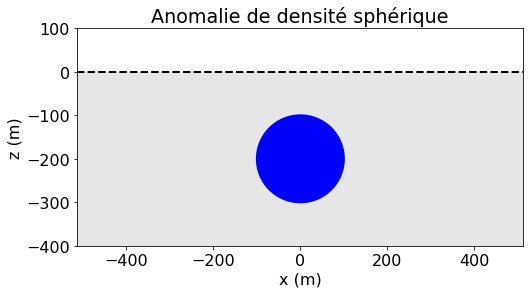

In [158]:
# *** Définir les paramètres de l'anomalie
x0 = 0  # position de la sphère sur l'axe x
z0 = -200  # position de la sphère sur l'axe z
a = 100  # rayon
rho = -2600  # contraste de densité avec le milieu encaissant


# *** Faire un graphique représentant le modèle
fig, ax = plt.subplots(1,1, figsize=(8,4))

ax.axhspan(1.5*(z0-a),0,color=[.9, .9, .9]) # Background gris représentant le milieu encaissant
ax.axhline(0,c="k",ls="--",lw=2)  # Ligne représentant la surface
circle = plt.Circle((x0, z0), a, color='b', linewidth=2, fill=True) # Definir cercle
ax.add_patch(circle) # Ajoter cercle au graphique

# Definir les noms et limites des axes et le titre
ax.set(xlabel="x (m)", ylabel="z (m)", title="Anomalie de densité sphérique")
ax.set_aspect('equal', adjustable="datalim")
ax.set(ylim=(-400,100), xlim=(x[0],x[-1]))

plt.show() # Afficher le graphique


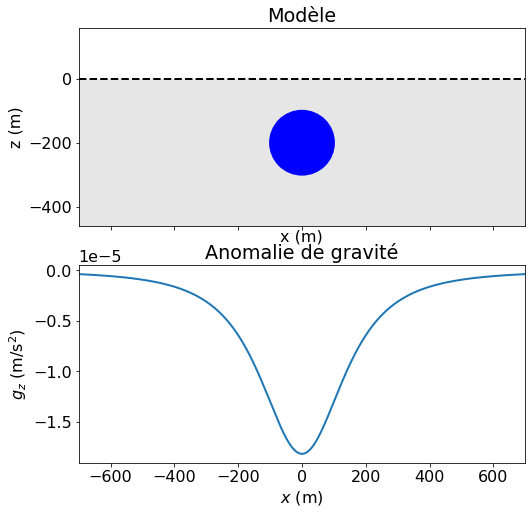

In [159]:
# *** On calcule maintenant la réponse gravimétrique de la sphère
gz = gravite_sphere(x, z, x0, z0, a, rho)


# *** Faire un graphique montrant la réponse gravimétrique
fig, ax = plt.subplots(2,1, figsize=(8,8), sharex=True)

# Modèle de la sphère
ax[0].axhspan(1.5*(z0-a),0,color=[.9, .9, .9])
ax[0].axhline(0,c="k",ls="--",lw=2)
circle = plt.Circle((x0, z0), a, color='b', lw=2, fill=True)
ax[0].add_patch(circle)
ax[0].set(xlabel="x (m)", ylabel="z (m)", title="Modèle")
ax[0].set_aspect('equal', adjustable="datalim")
ax[0].set(ylim=(-400,100), xlim=(x[0],x[-1]))

# Réponse gravimetrique
ax[1].plot(x,gz,linewidth=2)
ax[1].set(xlabel='$x$ (m)', ylabel='$g_z$ (m/s$^2$)', title="Anomalie de gravité")

plt.show()

# Exercice

Maintenant comparons l'effet d'un changement des paramètres de la sphère. 

Essayez de modifier:
- Le rayon de sphère
- Le contraste de densité de la sphère (amplitude et signe)
- La profondeur de la sphère

et comparez les réponses gravimétriques


In [149]:
# *** MODIFIEZ LES PARAMÈTRES CI-DESSOUS UN-À-UN ***

# Définir une nouvelle anomalie sphérique
x0_2 = 0  # position de la sphère sur l'axe x
z0_2 = -100  # position de la sphère sur l'axe z
a_2 = 100  # rayon
rho_2 = -2600  # contraste de densité avec le milieu encaissant


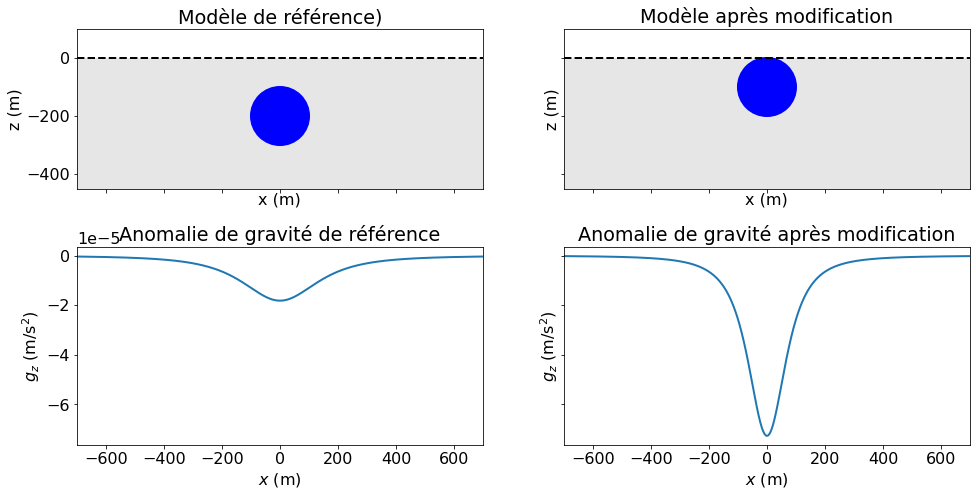

In [160]:
# *** On calcule maintenant la réponse gravimétrique de la nouvelle anomalie sphérique
gz_2 = gravite_sphere(x, z, x0_2, z0_2, a_2, rho_2)

# *** Faire le graphique comparant les réponses
zmin = min([z0-a, z0_2-a_2]) # profondeur max des anomalies

fig, ax = plt.subplots(2, 2, figsize=(16,8), sharey="row", sharex="col")

# Première anomalie (référence)

# Modèle de la sphère
ax[0][0].axhspan(1.5*zmin,0,color=[.9, .9, .9])
ax[0][0].axhline(0,c="k",ls="--",lw=2)
circle1 = plt.Circle((x0, z0), a, color='b', lw=2, fill=True)
ax[0][0].add_patch(circle1)
ax[0][0].set(xlabel="x (m)", ylabel="z (m)", title="Modèle de référence)")
ax[0][0].set_aspect('equal')
ax[0][0].set(ylim=(1.5*zmin,100), xlim=(x[0],x[-1]))

# Réponse gravimetrique
ax[1][0].plot(x,gz,linewidth=2)
ax[1][0].set(xlabel='$x$ (m)', ylabel='$g_z$ (m/s$^2$)', title="Anomalie de gravité de référence")

   
# Deuxième anomalie (votre modification)

# Modèle de la sphère
ax[0][1].axhspan(1.5*zmin,0,color=[.9, .9, .9])
ax[0][1].axhline(0,c="k",ls="--",lw=2)
circle2 = plt.Circle((x0_2, z0_2), a_2, color='b', lw=2, fill=True)
ax[0][1].add_patch(circle2)
ax[0][1].set(xlabel="x (m)", ylabel="z (m)", title="Modèle après modification")
ax[0][1].set_aspect('equal')
ax[0][1].set(ylim=(1.5*zmin,100), xlim=(x[0],x[-1]))

# Réponse gravimetrique
ax[1][1].plot(x,gz_2,linewidth=2)
ax[1][1].set(xlabel='$x$ (m)', ylabel='$g_z$ (m/s$^2$)', title="Anomalie de gravité après modification")

plt.show()

# Question:
    
Que remarquez-vous dans la réponse gravimétrique en changeant la profondeur, le rayon et la densité en termes de:
- Amplitude du pic
- Largeur à mi-hauter du pic